In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("data/github_trending_repos.csv")
df.head()


,owner,repo_name,full_name,description,language,stars,forks,stars_period,contributors_count,url,search_language,timeframe,scraped_at
0,sansan0,TrendRadar,sansan0/TrendRadar,🎯 告别信息过载，AI 助你看懂新闻资讯热点，简单的舆情监控分析 - 多平台热点聚合+基于 ...,Python,36604,19908,1067,0,https://github.com/sansan0/TrendRadar,overall,daily,2025-12-03 17:34:14.528785
1,google,adk-go,google/adk-go,"An open-source, code-first Go toolkit for buil...",Go,5920,396,118,0,https://github.com/google/adk-go,overall,daily,2025-12-03 17:34:14.529175
2,TapXWorld,ChinaTextbook,TapXWorld/ChinaTextbook,所有小初高、大学PDF教材。,Roff,60750,13494,226,0,https://github.com/TapXWorld/ChinaTextbook,overall,daily,2025-12-03 17:34:14.529535
3,yeongpin,cursor-free-vip,yeongpin/cursor-free-vip,[Support 0.49.x]（Reset Cursor AI MachineID & B...,Python,44916,5365,250,0,https://github.com/yeongpin/cursor-free-vip,overall,daily,2025-12-03 17:34:14.529894
4,nvm-sh,nvm,nvm-sh/nvm,Node Version Manager - POSIX-compliant bash sc...,Shell,90205,9641,67,0,https://github.com/nvm-sh/nvm,overall,daily,2025-12-03 17:34:14.530228


In [8]:
df.shape


(1587, 13)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   owner               1587 non-null   object
 1   repo_name           1587 non-null   object
 2   full_name           1587 non-null   object
 3   description         1551 non-null   object
 4   language            1587 non-null   object
 5   stars               1587 non-null   int64 
 6   forks               1587 non-null   int64 
 7   stars_period        1587 non-null   int64 
 8   contributors_count  1587 non-null   int64 
 9   url                 1587 non-null   object
 10  search_language     1587 non-null   object
 11  timeframe           1587 non-null   object
 12  scraped_at          1587 non-null   object
dtypes: int64(4), object(9)
memory usage: 161.3+ KB


/var/folders/md/yd2vmfss3hd44h83h1hrq3fh0000gn/T/ipykernel_23549/463675582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


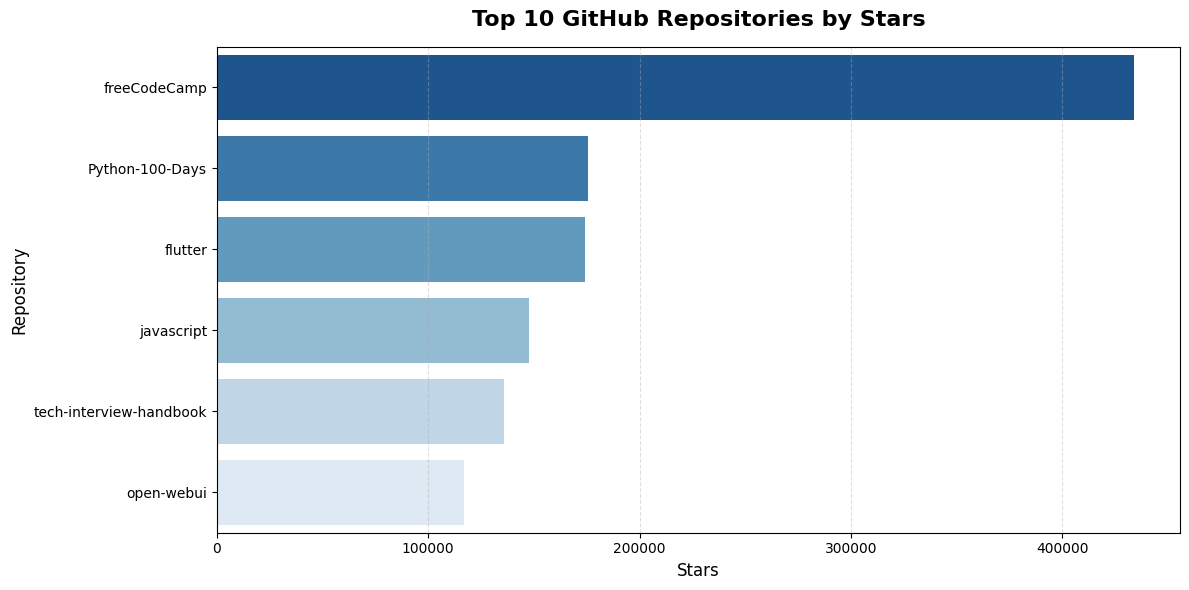

In [29]:
# Top 10 Repositories by Stars ⭐
plt.figure(figsize=(12,6))

sns.barplot(
    data=top_starred,
    x="stars",
    y="repo_name",
    palette="Blues_r"
)

plt.title(
    "Top 10 GitHub Repositories by Stars",
    fontsize=16,
    fontweight="bold",
    pad=15
)

plt.xlabel("Stars", fontsize=12)
plt.ylabel("Repository", fontsize=12)

# Grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


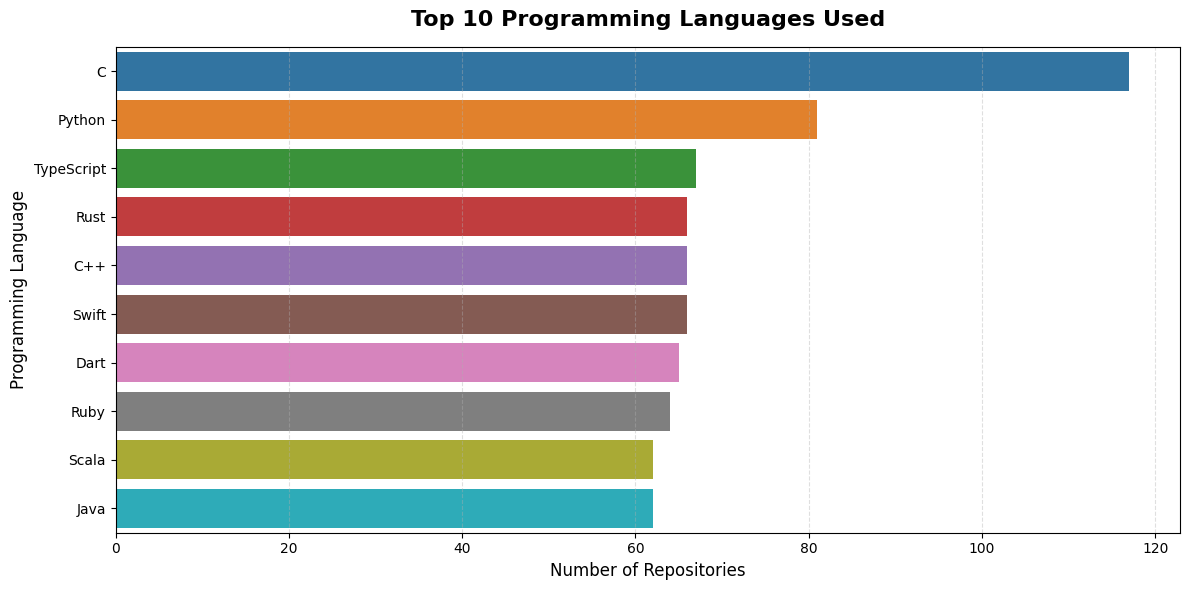

In [31]:
# Most Popular Programming Languages


plt.figure(figsize=(12,6))

sns.barplot(
    x=language_count.values,
    y=language_count.index,
    hue=language_count.index,   # assign hue
    palette="tab10",
    legend=False                # remove legend
)

plt.title(
    "Top 10 Programming Languages Used",
    fontsize=16,
    fontweight="bold",
    pad=15
)

plt.xlabel("Number of Repositories", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



/var/folders/md/yd2vmfss3hd44h83h1hrq3fh0000gn/T/ipykernel_23549/3350773892.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_stars_lang.index, y=avg_stars_lang.values,palette="tab10")


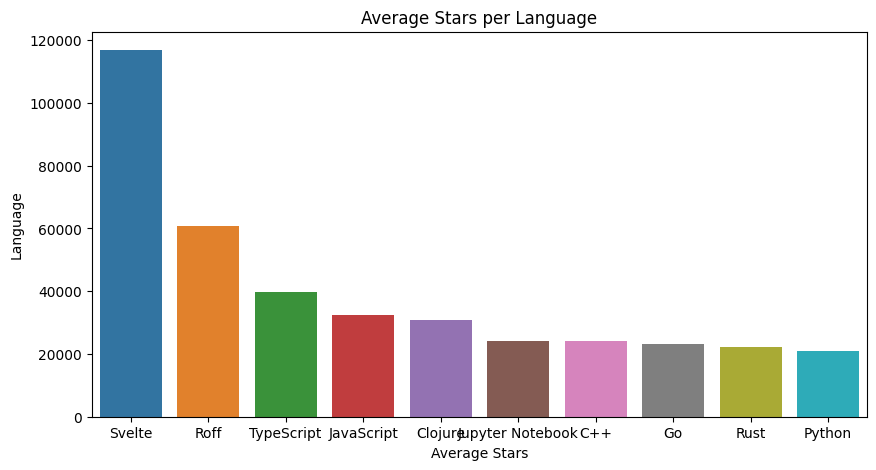

In [32]:
# Average Stars per Language

avg_stars_lang = (
    df.groupby("language")["stars"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_stars_lang.index, y=avg_stars_lang.values,palette="tab10")
plt.title("Average Stars per Language")
plt.xlabel("Average Stars")
plt.ylabel("Language")
plt.show()


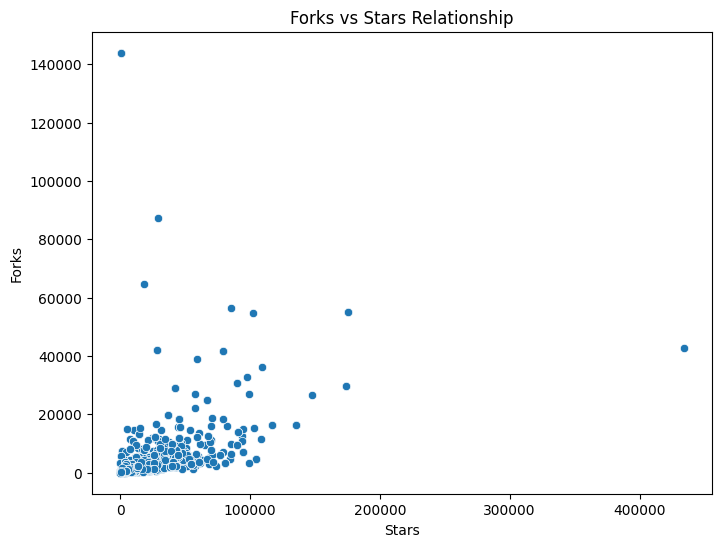

In [34]:
# Forks vs Stars Relationshipabs

plt.figure(figsize=(8,6))
sns.scatterplot(x="stars", y="forks", data=df)
plt.title("Forks vs Stars Relationship")
plt.xlabel("Stars")
plt.ylabel("Forks")
plt.show()
